In [184]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

In [185]:
train_df = pd.read_csv('train.csv')

In [186]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [187]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [188]:
y_train = np.array(train_df['SalePrice'])

In [189]:
y_train.shape

(1460,)

In [190]:
y_train[0]

208500

In [191]:
train_df = train_df.drop(labels=['Id', 'SalePrice'], axis=1)

In [192]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

In [193]:
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].mean())
train_df[cat_cols] = train_df[cat_cols].fillna("None")

In [194]:
from sklearn.preprocessing import OneHotEncoder

In [195]:
train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)

In [196]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
scaler = MinMaxScaler()

In [198]:
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

In [199]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 260 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(224), float64(36)
memory usage: 730.1 KB


In [200]:
x_train = np.array(train_df).astype(np.float32)

In [201]:
x_train.shape

(1460, 260)

In [202]:
y_train = np.array(y_train).astype(np.float32)

In [203]:
y_train.shape

(1460,)

In [204]:
from keras import layers, optimizers, callbacks
from keras.callbacks import LearningRateScheduler

In [205]:
model = keras.Sequential([
    layers.Dense(260, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(260, activation='relu'),
    layers.Dense(260, activation='relu'),
    layers.Dense(1)  
])

/Users/chuck/python-projects/kaggle/ames_housing_prices/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [206]:
lr_schedule = lambda epoch: 0.001 * 10**(epoch / 20)
lr_callback = LearningRateScheduler(lr_schedule)

In [207]:
model.compile(
    optimizer="rmsprop",
    loss='mse',             
    metrics=['mae']         
)

In [208]:
# history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[lr_callback])

In [209]:
import matplotlib.pyplot as plt

In [210]:
model = keras.Sequential([
    layers.Dense(260, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(260, activation='relu'),
    layers.Dense(1)  
])

In [211]:
optimizer = optimizers.RMSprop(learning_rate=0.005)

In [212]:
model.compile(
    optimizer=optimizer,
    loss='mse',             
    metrics=['mae']         
)

In [213]:
# history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=64)

In [214]:
model = keras.Sequential([
    layers.Dense(260, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(260, activation='relu'),
    layers.Dense(1)  
])

In [215]:
optimizer = optimizers.Adam(learning_rate=0.001)

In [216]:
model.compile(
    optimizer=optimizer,
    loss="mse",
    metrics=["mae"]
)


In [217]:
# history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

In [218]:
y_train_log_pre = np.log1p(y_train)

In [219]:
history = model.fit(x_train, y_train_log_pre, validation_split=0.2, epochs=25, batch_size=32)

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 55.2637 - mae: 6.1661 - val_loss: 0.7273 - val_mae: 0.7244
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6827 - mae: 0.6701 - val_loss: 0.2496 - val_mae: 0.3841
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1797 - mae: 0.3294 - val_loss: 0.1683 - val_mae: 0.3188
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1044 - mae: 0.2509 - val_loss: 0.1434 - val_mae: 0.2895
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0830 - mae: 0.2260 - val_loss: 0.1324 - val_mae: 0.2736
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0645 - mae: 0.1983 - val_loss: 0.1218 - val_mae: 0.2583
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0523 - mae: 0.1746 - val_loss: 0.1143 - val_mae: 0.2397
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0508 - mae: 0.1756 - val_loss: 0.1082 - val_mae: 0.2283
Epoch 9/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0383 - mae:

In [282]:
def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
    )
    return model

In [221]:
from sklearn.model_selection import train_test_split

In [240]:
x_train, x_val, y_train_log, y_val_log = train_test_split(
    x_train, y_train_log_pre, test_size=0.2, random_state=42)

In [283]:
print(x_train.shape, x_val.shape, y_train_log.shape, y_val_log.shape)

(1168, 260) (292, 260) (1168,) (292,)


In [284]:
history = model.fit(x_train, y_train_log, epochs=50, batch_size=256)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3447e-04 - mae: 0.0086
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1220e-04 - mae: 0.0075 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2011e-04 - mae: 0.0076 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.4008e-05 - mae: 0.0063
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.5808e-05 - mae: 0.0061
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0181e-04 - mae: 0.0065
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1168e-04 - mae: 0.0073
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4256e-05 - mae: 0.0064
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1005e-04 - mae: 0.0073 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.5696e-05 - mae: 0.0067
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0478e-04 - mae: 0.0069
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0037e-04 - mae: 0.0066
Epoch 13/50
5

In [285]:
val_preds_log = model.predict(x_val)
val_preds = np.expm1(val_preds_log)
y_val = np.expm1(y_val_log)
mae = np.mean(np.abs(val_preds - y_val))
print(f"Validation MAE on original scale: ${mae:,.0f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Validation MAE on original scale: $86,874


In [227]:
y_train.shape

(1460,)

In [228]:
y_train.min()

34900.0

In [229]:
y_train.max()

755000.0

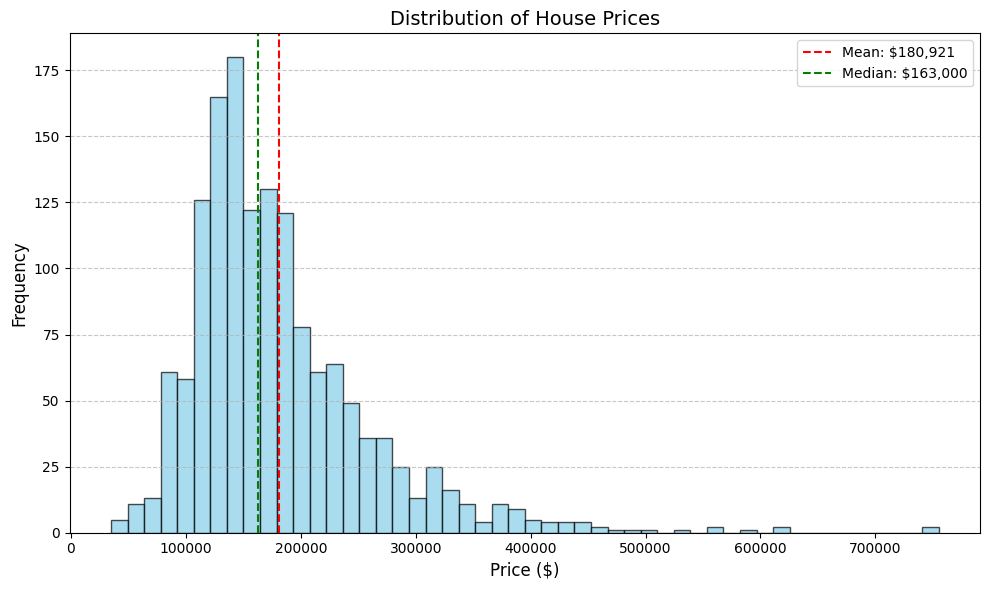

In [230]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of House Prices', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(np.mean(y_train), color='red', linestyle='--', label=f'Mean: ${np.mean(y_train):,.0f}')
plt.axvline(np.median(y_train), color='green', linestyle='--', label=f'Median: ${np.median(y_train):,.0f}')
plt.legend()
plt.tight_layout()
plt.show()

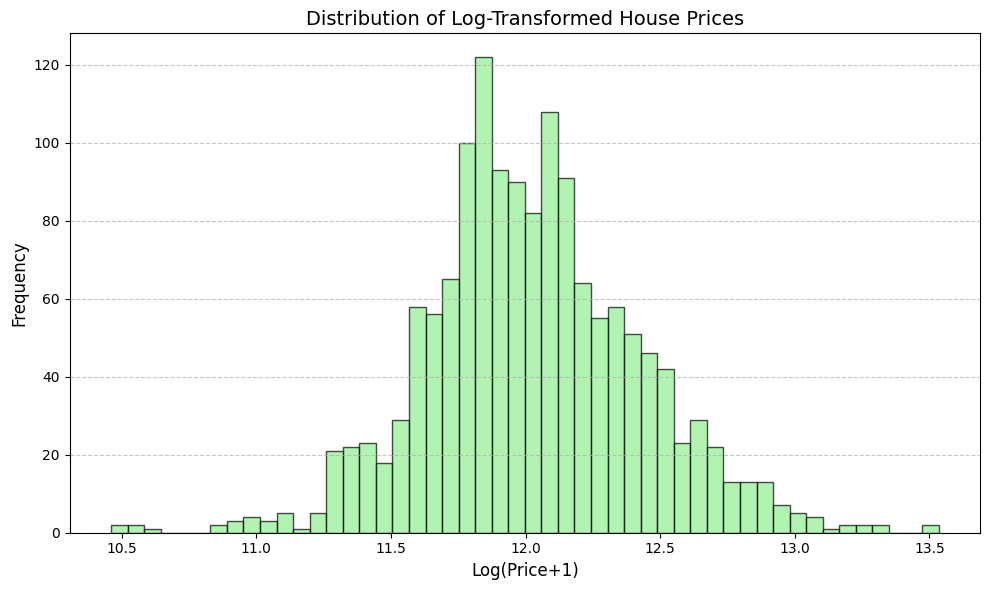

In [231]:
plt.figure(figsize=(10, 6))
plt.hist(y_train_log_pre, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Log-Transformed House Prices', fontsize=14)
plt.xlabel('Log(Price+1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [243]:
print(np.any(np.isnan(x_train)))
print(np.any(np.isnan(y_train_log)))
print(np.any(np.isinf(x_train)))
print(np.any(np.isinf(y_train_log)))

False
False
False
False
